In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

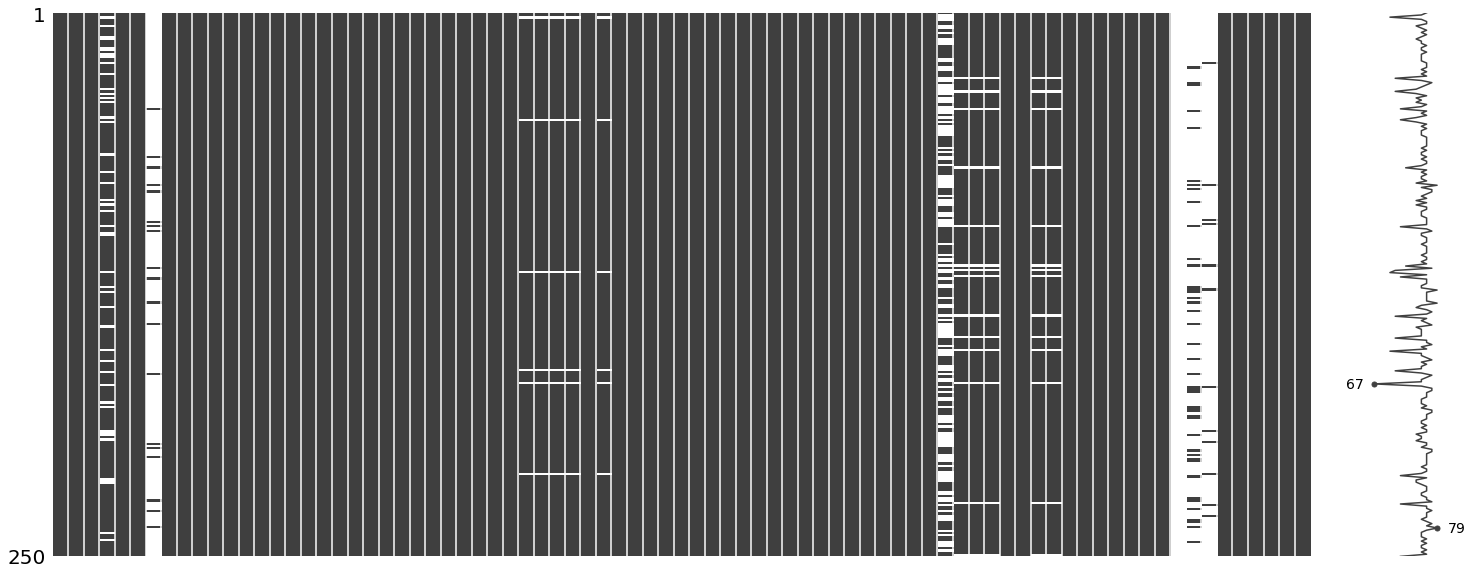

In [3]:
msno.matrix(train.sample(250))

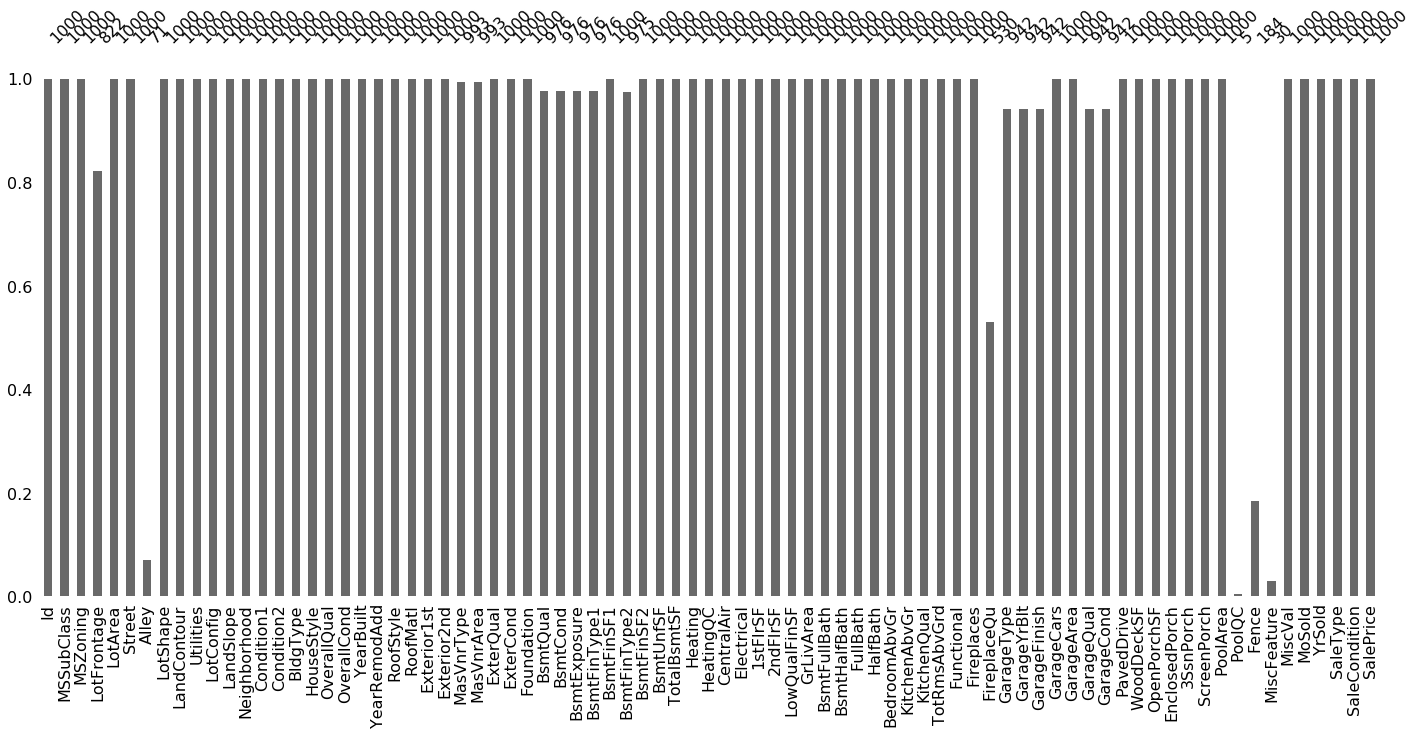

In [4]:
msno.bar(train.sample(1000))

In [5]:
# 看看每列缺失数据的比例，如果缺失太多说明没什么用，删除
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [6]:
missing.head(7)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479


In [7]:
def missing_rate(df):
    all_data_na = (df.isnull().sum() / len(df)) * 100
    all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
    missing = pd.DataFrame({'Missing Ratio': all_data_na})
    return missing.head(30)

In [8]:
missing_rate(train)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945
